In [1]:
import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

california_housing_df = pd.read_csv('https://storage.googleapis.com/mledu-datasets/california_housing_train.csv',sep=',')
california_housing_df = california_housing_df.reindex(
    np.random.permutation(california_housing_df.index))
california_housing_df

C:\Users\StrikeWade\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
12143,-121.44,37.74,25.0,456.0,116.0,370.0,106.0,3.1319,112500.0
7569,-118.36,33.83,35.0,2828.0,487.0,1439.0,490.0,5.6013,350200.0
13764,-122.01,38.25,11.0,6550.0,1149.0,3570.0,1123.0,3.8583,137900.0
14044,-122.05,37.90,32.0,4498.0,862.0,1818.0,851.0,4.8088,321200.0
13247,-121.91,37.44,26.0,1669.0,276.0,951.0,278.0,4.7794,225800.0
4223,-118.00,34.13,35.0,1005.0,224.0,742.0,221.0,3.5481,158100.0
12708,-121.77,37.33,8.0,3088.0,474.0,1799.0,456.0,7.2707,355300.0
4412,-118.03,34.07,37.0,1091.0,269.0,905.0,242.0,3.1042,152000.0
5374,-118.15,33.98,17.0,3361.0,925.0,3264.0,914.0,2.2813,145600.0
7154,-118.32,33.79,32.0,2381.0,467.0,1264.0,488.0,4.1477,315100.0


In [2]:
def preprocess_features(california_housing_df):
    selected_features = california_housing_df[
        [
            'longitude',
            'latitude',
            'housing_median_age',
            'total_rooms',
            'total_bedrooms',
            'population',
            'households',
            'median_income'
        ]
    ]
    processed_features = selected_features.copy()
    #Synthetic feature
    processed_features['rooms_per_person'] = california_housing_df['total_rooms'] / california_housing_df['population']
    return processed_features
    
def preprocess_targets(california_housing_df):
    output_targets = pd.DataFrame()
    output_targets['median_house_value_is_high'] = (california_housing_df['median_house_value'] > 265000).astype(float)
    return output_targets

In [3]:
#Split dataset
training_examples = preprocess_features(california_housing_df.head(12000))
training_targets = preprocess_targets(california_housing_df.head(12000))

validation_examples = preprocess_features(california_housing_df.tail(5000))
validation_targets = preprocess_targets(california_housing_df.tail(5000))

display.display(training_examples)
display.display(training_targets)
display.display(validation_examples)
display.display(validation_targets)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
12143,-121.44,37.74,25.0,456.0,116.0,370.0,106.0,3.1319,1.232432
7569,-118.36,33.83,35.0,2828.0,487.0,1439.0,490.0,5.6013,1.965254
13764,-122.01,38.25,11.0,6550.0,1149.0,3570.0,1123.0,3.8583,1.834734
14044,-122.05,37.90,32.0,4498.0,862.0,1818.0,851.0,4.8088,2.474147
13247,-121.91,37.44,26.0,1669.0,276.0,951.0,278.0,4.7794,1.754995
4223,-118.00,34.13,35.0,1005.0,224.0,742.0,221.0,3.5481,1.354447
12708,-121.77,37.33,8.0,3088.0,474.0,1799.0,456.0,7.2707,1.716509
4412,-118.03,34.07,37.0,1091.0,269.0,905.0,242.0,3.1042,1.205525
5374,-118.15,33.98,17.0,3361.0,925.0,3264.0,914.0,2.2813,1.029718
7154,-118.32,33.79,32.0,2381.0,467.0,1264.0,488.0,4.1477,1.883703


,median_house_value_is_high
12143,0.0
7569,1.0
13764,0.0
14044,1.0
13247,0.0
4223,0.0
12708,1.0
4412,0.0
5374,0.0
7154,1.0


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
16959,-124.16,40.95,20.0,1075.0,214.0,529.0,196.0,3.1406,2.032136
14606,-122.17,39.94,32.0,2352.0,477.0,1316.0,447.0,2.2292,1.787234
6870,-118.30,33.89,30.0,2756.0,858.0,1806.0,787.0,3.0329,1.526024
4421,-118.03,33.98,46.0,1974.0,465.0,880.0,441.0,2.7578,2.243182
970,-117.09,32.69,20.0,1102.0,205.0,852.0,217.0,3.1833,1.293427
7943,-118.41,34.25,19.0,280.0,84.0,483.0,87.0,1.9500,0.579710
15171,-122.27,40.53,17.0,2255.0,416.0,1171.0,411.0,2.8750,1.925705
8208,-118.44,34.20,17.0,2934.0,950.0,2517.0,889.0,2.9360,1.165673
13861,-122.02,37.34,28.0,2488.0,396.0,1190.0,410.0,5.7881,2.090756
13987,-122.04,37.58,14.0,14917.0,2708.0,8012.0,2606.0,5.6277,1.861832


,median_house_value_is_high
16959,0.0
14606,0.0
6870,0.0
4421,0.0
970,0.0
7943,0.0
15171,0.0
8208,0.0
13861,1.0
13987,1.0


In [4]:
def my_input_function(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    #Convert pandas data into a dict of np arrays
    features = {key:np.array(value) for key,value in dict(features).items()}
    
    #Construct a dataset and configure batch repeat
    ds = Dataset.from_tensor_slices((features, targets))
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    #shuffle if specified
    if shuffle:
        ds = ds.shuffle(10000)
    
    #return the next batch of data
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

def get_quantile_based_buckets(feature_values, num_buckets):
    quantiles = feature_values.quantile(
        [(i+1.)/(num_buckets + 1.) for i in range(num_buckets)])
    return [quantiles[q] for q in quantiles.keys()]

def construct_feature_columns():
    #Construct TF feature columns
    
    bucketized_households = tf.feature_column.bucketized_column(
        tf.feature_column.numeric_column('households'),
        boundaries=get_quantile_based_buckets(training_examples['households'], 10))
    
    bucketized_longitude = tf.feature_column.bucketized_column(
        tf.feature_column.numeric_column('longitude'),
        boundaries=get_quantile_based_buckets(training_examples['longitude'], 50))
    
    bucketized_latitude = tf.feature_column.bucketized_column(
        tf.feature_column.numeric_column('latitude'),
        boundaries=get_quantile_based_buckets(training_examples['latitude'], 50))

    bucketized_housing_median_age = tf.feature_column.bucketized_column(
        tf.feature_column.numeric_column('housing_median_age'),
        boundaries=get_quantile_based_buckets(training_examples['housing_median_age'], 10))

    bucketized_total_rooms = tf.feature_column.bucketized_column(
        tf.feature_column.numeric_column('total_rooms'),
        boundaries=get_quantile_based_buckets(training_examples['total_rooms'], 10))
    
    bucketized_total_bedrooms = tf.feature_column.bucketized_column(
        tf.feature_column.numeric_column('total_bedrooms'),
        boundaries=get_quantile_based_buckets(training_examples['total_bedrooms'], 10))
    
    bucketized_population = tf.feature_column.bucketized_column(
        tf.feature_column.numeric_column('population'),
        boundaries=get_quantile_based_buckets(training_examples['population'], 10))
    
    bucketized_median_income = tf.feature_column.bucketized_column(
        tf.feature_column.numeric_column('median_income'),
        boundaries=get_quantile_based_buckets(training_examples['median_income'], 10))
    
    bucketized_rooms_per_person = tf.feature_column.bucketized_column(
        tf.feature_column.numeric_column('rooms_per_person'),
        boundaries=get_quantile_based_buckets(training_examples['rooms_per_person'], 10))
    
    long_x_lat = tf.feature_column.crossed_column(
        set([bucketized_longitude, bucketized_latitude]), hash_bucket_size=1000)
    
    feature_columns = set([
            long_x_lat,
            bucketized_longitude,
            bucketized_latitude,
            bucketized_households,
            bucketized_housing_median_age,
            bucketized_total_rooms,
            bucketized_total_bedrooms,
            bucketized_population,
            bucketized_median_income,
            bucketized_rooms_per_person
        ])
    return feature_columns

Calculate the Model Size

In [5]:
def model_size(estimator):
    variables = estimator.get_variable_names()
    size = 0
    for variable in variables:
        if not any(x in variable for x in ['global_step',
                                           'centered_bias_weight',
                                           'bias_weight',
                                           'Ftrl']):
            size += np.count_nonzero(estimator.get_variable_value(variable))
    return size

In [6]:
def train_linear_classifier_model(learning_rate,
                                 regularization_strength,
                                 steps,
                                 batch_size,
                                 feature_columns,
                                 training_examples,
                                 training_targets,
                                 validation_examples,
                                 validation_targets):
    periods = 7
    steps_per_period = steps/periods
    
    #Create a linear classifier object
    my_optimizer = tf.train.FtrlOptimizer(learning_rate=learning_rate, l1_regularization_strength=regularization_strength)
    my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
    linear_classifier = tf.estimator.LinearClassifier(feature_columns=feature_columns, optimizer=my_optimizer)
    
    #Create input function
    training_input_function = lambda: my_input_function(training_examples, training_targets['median_house_value_is_high'], batch_size=batch_size)
    predict_training_input_function = lambda: my_input_function(training_examples, training_targets['median_house_value_is_high'], shuffle=False, num_epochs=1)
    predict_validation_input_function = lambda: my_input_function(validation_examples, validation_targets['median_house_value_is_high'], shuffle=False, num_epochs=1)
    
    
    
    #Train the model
    print('Training model....')
    print('Logloss on validation data: ')
    training_log_losses = []
    validation_log_losses = []
    
    for period in range(0, periods):
        #Train the model starting from prior state
        linear_classifier.train(input_fn=training_input_function, steps=steps_per_period)
        
        #Compute predictions
        training_probabilities = linear_classifier.predict(input_fn=predict_training_input_function)
        training_probabilities = np.array([item['probabilities'] for item in training_probabilities])
        
        validation_probabilities = linear_classifier.predict(input_fn=predict_validation_input_function)
        validation_probabilities = np.array([item['probabilities'] for item in validation_probabilities])
        
        #Compute loss
        training_log_loss = metrics.log_loss(training_targets, training_probabilities)
        validation_log_loss = metrics.log_loss(validation_targets, validation_probabilities)
        
        print(' period %02d: %0.2f' % (period, training_log_loss))
        print(' period %02d: %0.2f' % (period, validation_log_loss))
        
        training_log_losses.append(training_log_loss)
        validation_log_losses.append(validation_log_loss)
    print('Model training finished!!!')
    
    
    #Ouput a graph of loss metrics over period
    plt.xlabel('Periods')
    plt.ylabel('Logloss')
    plt.title('Logloss over periods')
    plt.tight_layout()
    plt.plot(training_log_losses, label='training')
    plt.plot(validation_log_losses, label='validation')
    plt.legend()
    plt.show()
    
    return linear_classifier

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_num_worker_replicas': 1, '_task_type': 'worker', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000255943A4F28>, '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_session_config': None, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_tf_random_seed': None, '_service': None, '_keep_checkpoint_max': 5, '_model_dir': 'C:\\Users\\STRIKE~1\\AppData\\Local\\Temp\\tmplpehj7az', '_save_checkpoints_steps': None}
Training model....
Logloss on validation data: 
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\STRIKE~1\AppData\Local\Temp\tmplpehj7az\model.ckpt.
INFO:tensorflow:step = 1, loss = 69.31472
INFO:tensorflow:Saving checkpoints for 43 into C:\Users\STRIKE~1\AppData\Local\Temp\tmplpehj7az\model.ckpt.
INFO:tensorflow:Loss for final

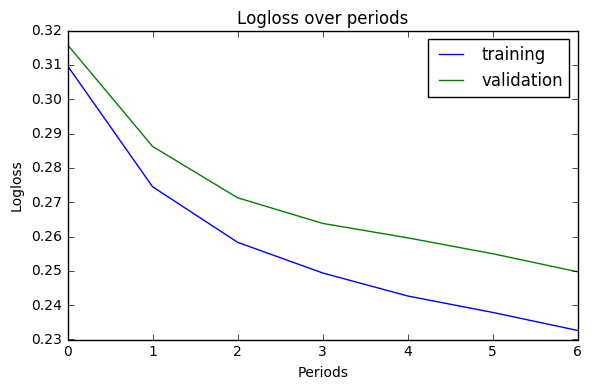

Model size:  750


In [7]:
tf.reset_default_graph()
linear_classifier = train_linear_classifier_model(
    learning_rate=0.1,
    regularization_strength=0.1,
    steps=300,
    batch_size=100,
    feature_columns=construct_feature_columns(),
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets
)

print('Model size: ', model_size(linear_classifier))

In [8]:
from keras import backend as K
def limit_mem():
    K.get_session().close()
    configure = K.tf.ConfigProto()
    configure.gpu_options.allow_growth = True
    K.set_session(K.tf.Session(config=configure))

Using TensorFlow backend.
